**Is the cleaning of the merger history affecting the fields im working with? (And sanity check!)**
- Load original and cleaned merger_history catalogs
- Plot them against each other!

In [1]:
"""
Created on Fri Mar 26 15:40:55 2021

Compare the cleaned catalog with the original one

@author: Lukas Eisert
"""

import h5py
import pandas as pd
import numpy as np

simulation = "TNG50-1"
snapshot_id = 99

fields = ["SnapNumLastMajorMerger"]
bonus_fields = ["MeanMassRatio", "MeanLookbackTime"]

orig_path = "./original/merger_history_%03d.hdf5" % (snapshot_id)
cleaned_path = "./output/" + simulation + "/postprocessing/MergerHistory/merger_history_cleaned_%03d.hdf5" % (snapshot_id)

orig_bonus_path = "./original/merger_history_bonus_%03d.hdf5" % (snapshot_id)
cleaned_bonus_path = "./output/" + simulation + "/postprocessing/MergerHistory/merger_history_bonus_cleaned_%03d.hdf5" % (snapshot_id)

def load(path, fields):
    with h5py.File(path, 'r') as f:
        out = np.zeros([len(f[fields[0]]), len(fields)])
        for i, field in enumerate(fields):
            out[:,i] = f[field][:]

    return pd.DataFrame(out, columns=fields)

print("Load orig catalog")
orig_cat = load(orig_path, fields)

print("Load cleaned catalog")    
clean_cat = load(cleaned_path, fields)

print("Load orig bonus catalog")
orig_bonus = load(orig_bonus_path, bonus_fields)

print("Load cleaned bonus catalog")    
clean_bonus = load(cleaned_bonus_path, bonus_fields)

Load orig catalog
Load cleaned catalog
Load orig bonus catalog
Load cleaned bonus catalog


In [2]:
#Concat the fields
orig = orig_cat.join(orig_bonus)
clean = clean_cat.join(clean_bonus)

print(orig)
print(clean)

         SnapNumLastMajorMerger  MeanMassRatio  MeanLookbackTime
0                          57.0       0.241660          4.556743
1                          37.0       0.207519          9.211077
2                          88.0       0.316785          4.643233
3                           4.0       0.083743          7.827385
4                           3.0       0.182037         10.750545
...                         ...            ...               ...
5688108                    -1.0      -1.000000         -1.000000
5688109                    -1.0      -1.000000         -1.000000
5688110                    -1.0      -1.000000         -1.000000
5688111                    -1.0      -1.000000         -1.000000
5688112                    -1.0      -1.000000         -1.000000

[5688113 rows x 3 columns]
         SnapNumLastMajorMerger  MeanMassRatio  MeanLookbackTime
0                          57.0       0.241769          4.558432
1                          37.0       0.207524          9.2109

**Now show the difference!**

In [3]:
#Plot Cleaned vs Original Values for each Field
import matplotlib.pyplot as plt
for field in orig.columns:
    plt.title(field)
    plt.scatter(orig[field], clean[field])
    plt.xlabel("Original")
    plt.ylabel("Cleaned")
    plt.grid()
    plt.show()

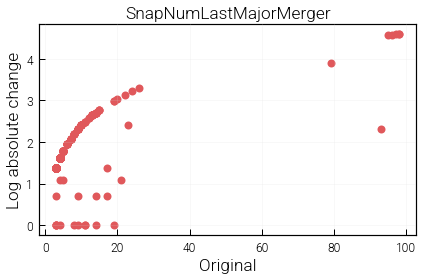

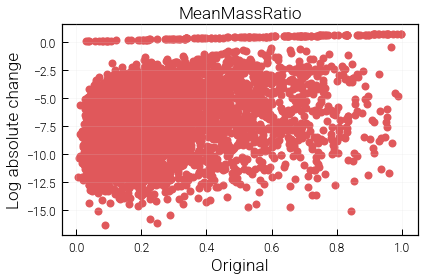

In [4]:
#Plot the Log Absolute Difference vs Original Values for each Field
diff = np.log(np.abs(orig - clean))
for field in orig.columns:
    plt.title(field)
    plt.scatter(orig[field], diff[field])
    plt.xlabel("Original")
    plt.ylabel("Log absolute change")
    plt.grid()
    plt.show()

Check if the codes for the orig and the supplementary catalogue produce the same numbers.

TNG50-1


TNG50-2


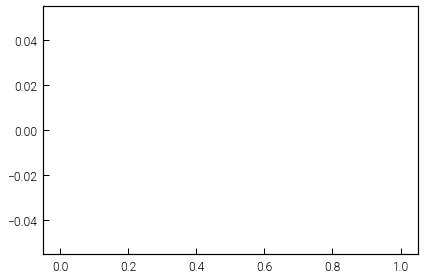

TNG50-3


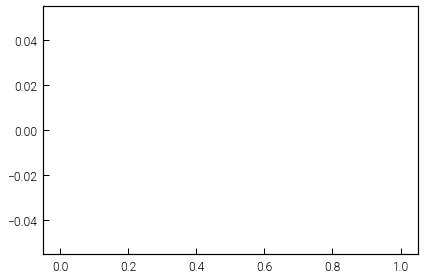

TNG50-4


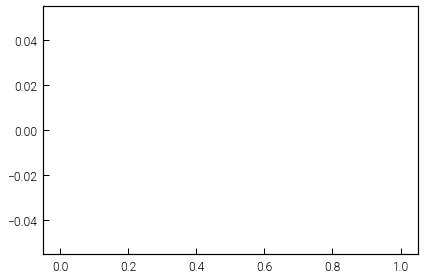

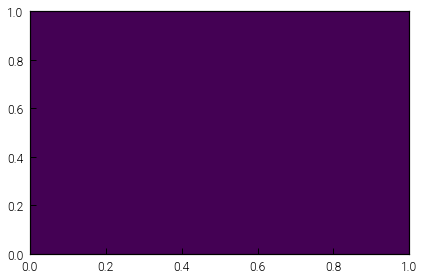

TNG100-1


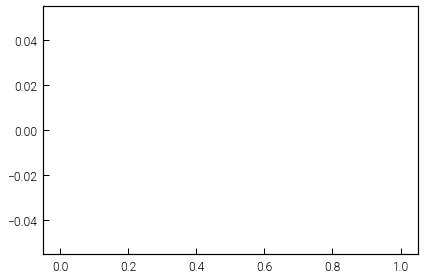

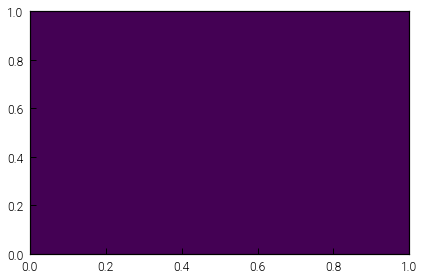

TNG100-2


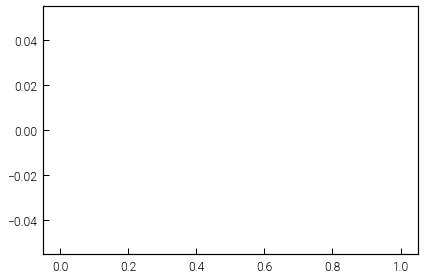

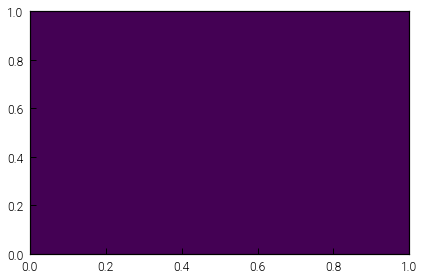

TNG100-3


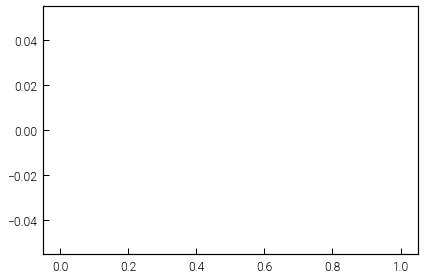

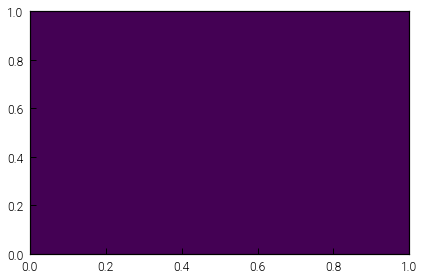

TNG300-1


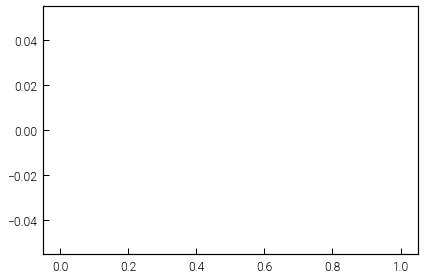

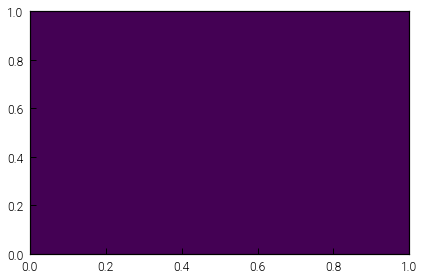

TNG300-2


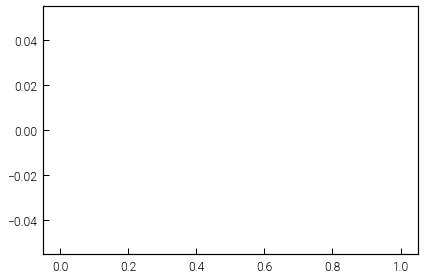

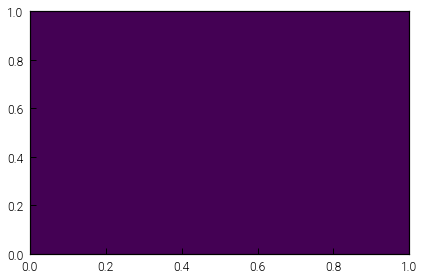

TNG300-3


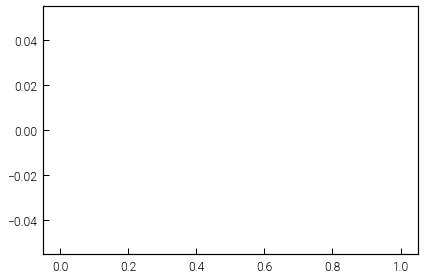

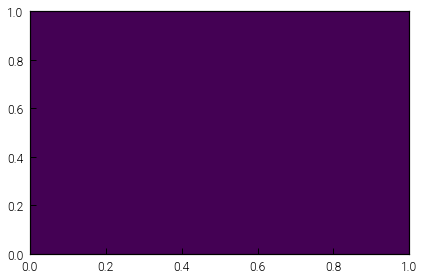

In [5]:
from multiprocessing import Pool
import matplotlib.pyplot as plt
import numpy as np

simulations = ['TNG50-1', 'TNG50-2', 'TNG50-3', 'TNG50-4', 'TNG100-1', 'TNG100-2', 'TNG100-3', 'TNG300-1', 'TNG300-2', 'TNG300-3'] 
snapshot_id = np.arange(100)


for sim in simulations:
    print(sim)
    
    def calc_missmatch(snap):
        try:
            cleaned_path = "./output/" + sim + "/postprocessing/MergerHistory/merger_history_cleaned_%03d.hdf5" % (snap)
            cleaned_supplementary_path = "./output/" + sim + "/postprocessing/MergerHistory/merger_history_supplementary_cleaned_%03d.hdf5" % (snap)

            f = "NumMergersLast2Gyr"
            orig = load(cleaned_path, [f])
            supp = load(cleaned_supplementary_path, [f])

            mm_mask = (orig[f] != supp[f])
            mm_diff = (orig[f][mm_mask] - supp[f][mm_mask])
                
            return mm_diff, orig[f][mm_mask]
        except:
            print("Warning: Snapnum " + str(snap))
            return [], []
    
    with Pool(16) as p:
        result = p.map(calc_missmatch, snapshot_id)
        mm_diff = [x[0] for x in result]
        orig = [x[1] for x in result]
        mm_diff = np.concatenate(mm_diff, axis=0)
        orig = np.concatenate(orig, axis=0)
        
        plt.hist(mm_diff)
        plt.show()
        plt.hist2d(orig, mm_diff)
        plt.show()
        
        
        